In [1]:
import numpy as np
import seaborn as sns
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as graph

graph.style.use('fivethirtyeight')

/home/harshil/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/home/harshil/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Estimating the mean and standard deviation of data

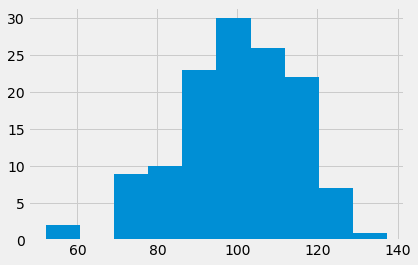

In [2]:
# Load data
true_mu, true_sd = 100, 15
data = stats.norm.rvs(loc=true_mu, scale=true_sd, size=130)

# Visualize
graph.hist(data)
graph.show()

In [3]:
# Model - data follows a normal distribution
with pm.Model() as model:
    # Priors
    mu = pm.Normal('mu', 100, 100)
    sd = pm.HalfNormal('sd', 100)
    
    # Likelihood
    obs = pm.Normal('observed', mu, sd, observed=data)
    
    trace = pm.sample(20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, mu]
 49%|████▉     | 10091/20500 [00:08<00:08, 1183.91it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '5847' (I am process '5848')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/harshil/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.4-64/lock_dir
 50%|████▉     | 10238/20500 [00:08<00:08, 1183.25it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '5847' (I am process '5849')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/harshil/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.4-64/lock_dir
100%|██████████| 20500/20500 [00:15<00:00, 1297.78it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '5848' (I am process '5849')
INFO (theano.gof.compilelock): To manually release 

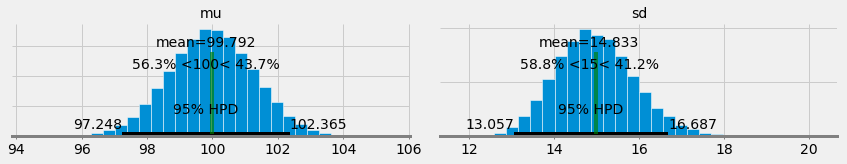

In [4]:
# Posterior
pm.plot_posterior(trace, ref_val=[true_mu, true_sd])
graph.show()

Inferred mean is 100.73 and standard deviation is 14.1

## Estimating the fairness of a coin

In [5]:
x = np.linspace(0, 1, 1000)

dist = stats.beta
n_trials = [0, 1, 5, 8, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])

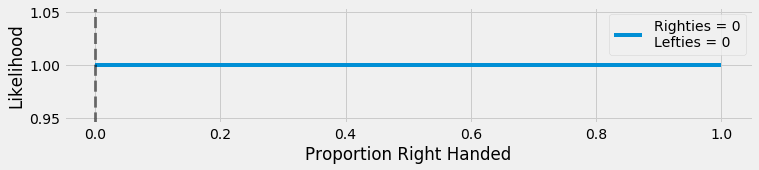

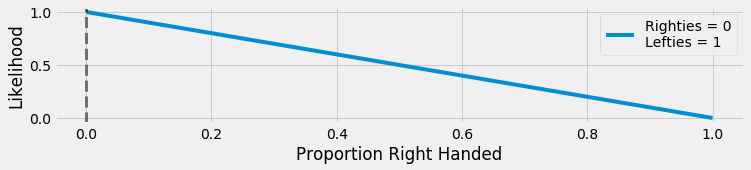

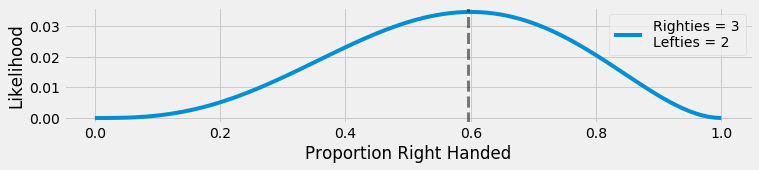

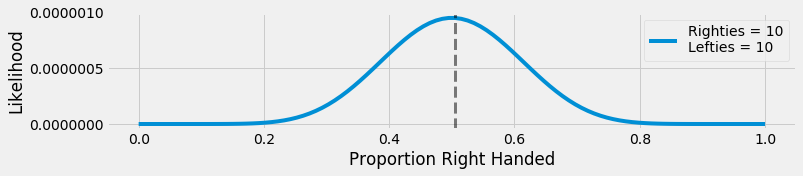

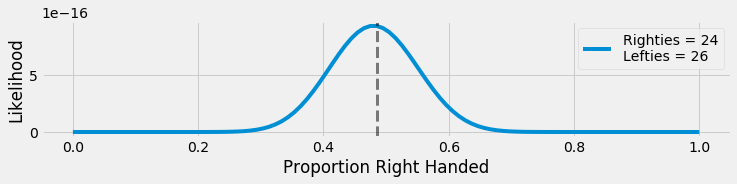

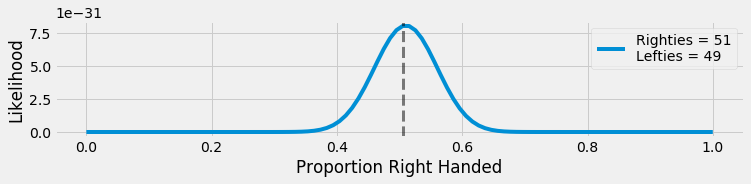

In [6]:
# Observe how the data affects the likelihood of each potential prior
n_trials = [0, 1, 5, 20, 50, 100]

for idx, n_trial in enumerate(n_trials):
    heads = data[:n_trial].sum()
    
    x = np.linspace(0, 1, 100)
    y = (x ** heads) * ((1 - x) ** (n_trial - heads))
    
    graph.figure(figsize=(11, 2))
    graph.plot(x, y, label=f'Righties = {heads}\nLefties = {n_trial - heads}')
    graph.axvline(x[np.argmax(y)], linestyle='--', linewidth=3, color='black', alpha=0.5)
    graph.ylabel('Likelihood')
    graph.xlabel('Proportion Right Handed') 
    graph.legend(loc=1)
    
    graph.savefig(f'figures/figure_{idx + 1}')
    graph.show()

## AB testing - Is there a difference in heights between males and females?

In [7]:
true_mu_males, true_mu_females, true_sd = 177, 164, 15
true_difference = true_mu_males - true_mu_females

# Make data
men = np.random.normal(true_mu_males, true_sd, size=100)
women = np.random.normal(true_mu_females, true_sd, size=100)

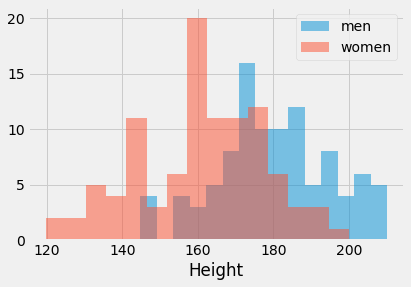

In [8]:
# Plot data
graph.hist(men, label='men', bins=15, alpha=0.5)
graph.xlabel('Height')

graph.hist(women, label='women', bins=15, alpha=0.5)
graph.xlabel('Height')
graph.legend()
graph.show()

In [9]:
# Model
with pm.Model() as ab_testing:
    # Priors
    mu_men = pm.Normal('mu_men', 0, 100 ** 2)
    mu_women = pm.Normal('mu_women', 0, 100 ** 2)
    sd = pm.HalfNormal('sd', 100 ** 2)
    
    # Deterministic
    delta = pm.Deterministic('height_delta', mu_men - mu_women)
    
    # Likelihood
    obs_men = pm.Normal('obs_men', mu_men, sd, observed=men)
    obs_women = pm.Normal('obs_women', mu_women, sd, observed=women)
    
    # Sample posterior
    trace = pm.sample(20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, mu_women, mu_men]
100%|██████████| 20500/20500 [00:16<00:00, 1242.97it/s]


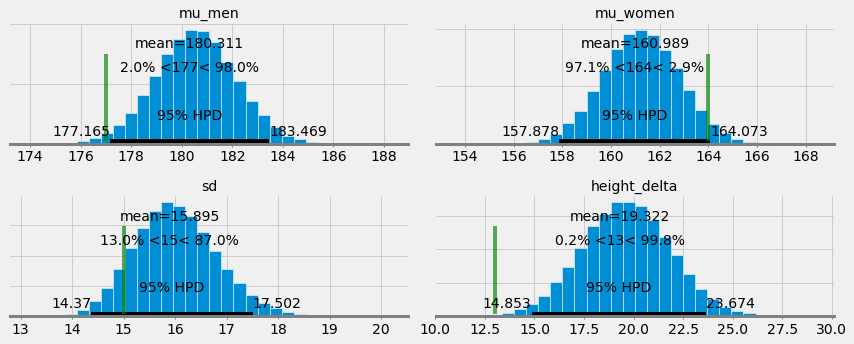

In [10]:
pm.plot_posterior(trace, ref_val=[true_mu_males, true_mu_females, true_sd, true_difference])
graph.show()

## Does the number of honeybee foragers change during the season

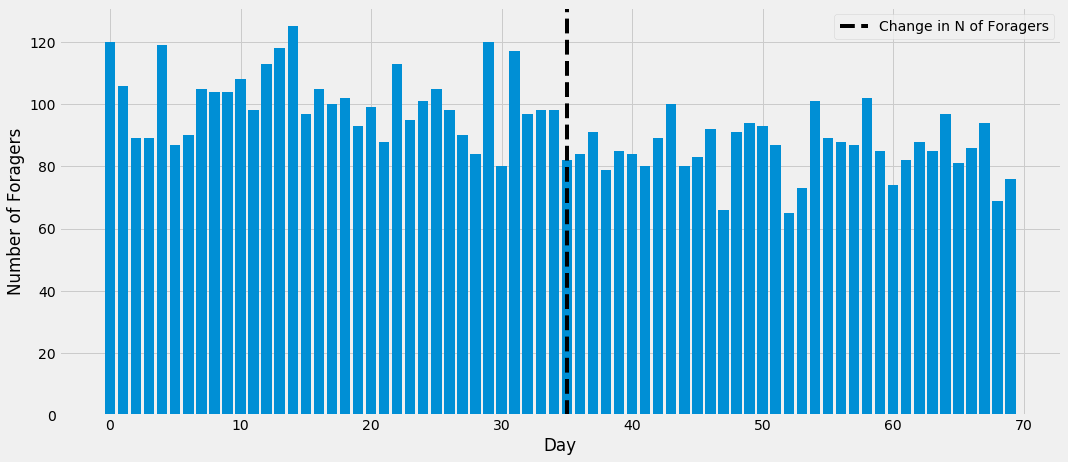

In [11]:
# Params
true_n_foragers_before = 100
true_n_foragers_after = 85
true_day_of_change = 35
total_days = 70

# Make data
foragers_before = stats.poisson(true_n_foragers_before).rvs(true_day_of_change)
foragers_after = stats.poisson(true_n_foragers_after).rvs(total_days - true_day_of_change)
foragers = np.vstack([foragers_before, foragers_after]).flatten()

# Plot 
graph.figure(figsize=(16, 7))
graph.bar(np.arange(len(foragers)), foragers)
graph.axvline(true_day_of_change, color='black', linestyle='dashed', label='Change in N of Foragers')
graph.xlabel('Day')
graph.ylabel('Number of Foragers')
graph.legend()
graph.show()

In [12]:
# Model
with pm.Model() as model_foragers:
    # Priors
    n_foragers_before = pm.Normal('N foragers before', 100, 100)
    n_foragers_after = pm.Normal('N foragers after', 100, 100)
    day_of_change = pm.DiscreteUniform('Day of change', lower=0, upper=len(foragers))
    
    # Switch priors given the day
    idx = np.arange(len(foragers))
    lambda_ = pm.math.switch(day_of_change > idx, n_foragers_before, n_foragers_after)
    
    # Likelihood
    observation = pm.Poisson("obs", lambda_, observed=foragers)
    
    # Sample
    trace = pm.sample(10000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [N foragers after, N foragers before]
>Metropolis: [Day of change]
100%|██████████| 10500/10500 [00:10<00:00, 961.35it/s]
The number of effective samples is smaller than 10% for some parameters.


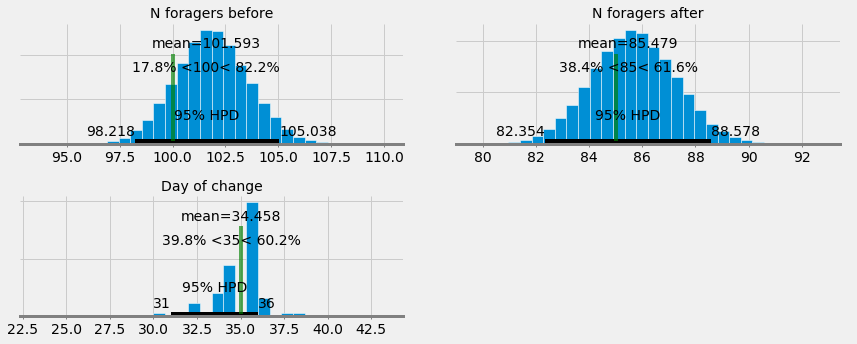

In [13]:
pm.plot_posterior(trace, ref_val=[true_n_foragers_before, true_n_foragers_after, true_day_of_change])
graph.show()